In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Data Preprocessing

In [5]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Correlation Analysis

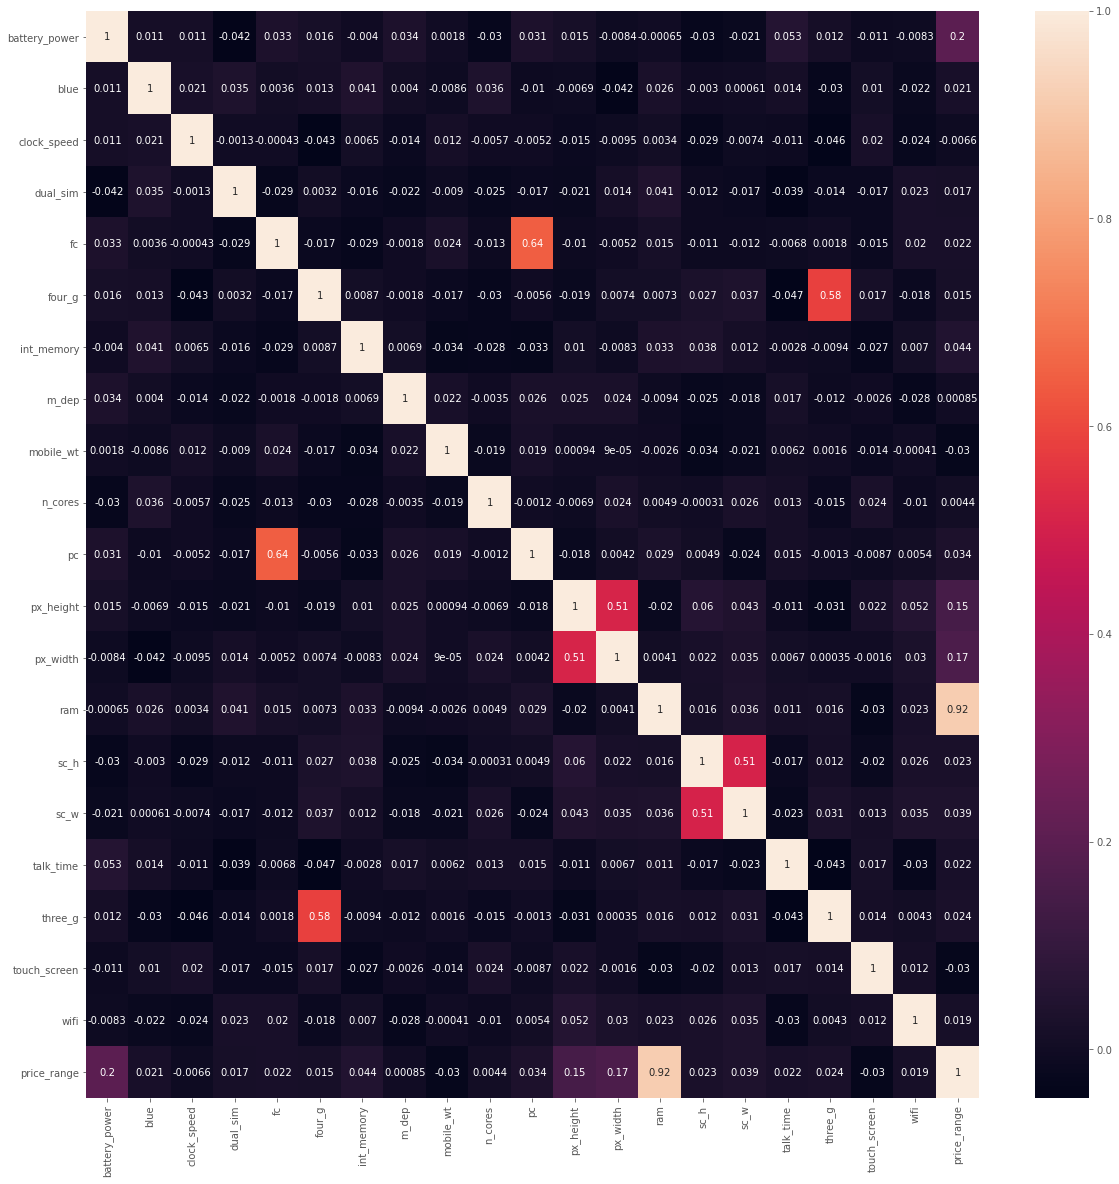

In [6]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [7]:
corrmat.sort_values(by=['price_range'],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

# Split train and test data

In [8]:
x = df.drop(['price_range'],axis = 1)
y = df['price_range']

In [9]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [10]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)
graph = []

(1340, 20) (660, 20) (1340,) (660,)


# Creating and training classification models
# 1. SVC - Linear, Polynomial, RBF

In [12]:
svmcm = SVC(C=0.1, kernel='rbf')
svmcm.fit(x_train,y_train.values.ravel())
svmcm.score(x_test,y_test)
y_svmcm_pred = svmcm.predict(x_test)

In [13]:
print("Accuracy Score: ", accuracy_score(y_test, svmcm.predict(x_test)))
graph.append(accuracy_score(y_test, svmcm.predict(x_test)))
print("Classification Report: ")
print()
print(classification_report(y_test,y_svmcm_pred))

Accuracy Score:  0.8818181818181818
Classification Report: 

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       163
           1       0.85      0.84      0.85       168
           2       0.82      0.84      0.83       164
           3       0.94      0.89      0.92       165

    accuracy                           0.88       660
   macro avg       0.88      0.88      0.88       660
weighted avg       0.88      0.88      0.88       660



In [14]:
svmcm = SVC(C=0.1, kernel='poly')
svmcm.fit(x_train,y_train.values.ravel())
svmcm.score(x_test,y_test)
y_svmcm_pred = svmcm.predict(x_test)

In [15]:
print("Accuracy Score: ", accuracy_score(y_test, svmcm.predict(x_test)))
graph.append(accuracy_score(y_test, svmcm.predict(x_test)))
print("Classification Report: ")
print()
print(classification_report(y_test,y_svmcm_pred))

Accuracy Score:  0.9333333333333333
Classification Report: 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       163
           1       0.91      0.87      0.89       168
           2       0.96      0.90      0.93       164
           3       0.98      0.97      0.98       165

    accuracy                           0.93       660
   macro avg       0.94      0.93      0.93       660
weighted avg       0.94      0.93      0.93       660



In [16]:
svmcm = SVC(C=0.1, kernel='linear')
svmcm.fit(x_train,y_train.values.ravel())
svmcm.score(x_test,y_test)
y_svmcm_pred = svmcm.predict(x_test)

In [17]:
print("Accuracy Score: ", accuracy_score(y_test, svmcm.predict(x_test)))
graph.append(accuracy_score(y_test, svmcm.predict(x_test)))
print("Classification Report: ")
print()
print(classification_report(y_test,y_svmcm_pred))

Accuracy Score:  0.9651515151515152
Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       163
           1       0.98      0.95      0.96       168
           2       0.95      0.95      0.95       164
           3       0.95      0.98      0.97       165

    accuracy                           0.97       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.97      0.97      0.97       660



# 2. KNN Classifier

In [18]:
knnm = KNeighborsClassifier(n_neighbors=10)
knnm.fit(x_train,y_train)
knnm.score(x_test,y_test)
y_knn_pred = knnm.predict(x_test)

In [19]:
print("Accuracy Score: ", accuracy_score(y_test,y_knn_pred))
graph.append(accuracy_score(y_test,y_knn_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_knn_pred))

Accuracy Score:  0.9257575757575758
Classification Report: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       163
           1       0.91      0.91      0.91       168
           2       0.87      0.88      0.88       164
           3       0.98      0.91      0.94       165

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



# 3. Decision Tree Classifier

In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)
y_pred = dtc.predict(x_test)

In [21]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
graph.append(accuracy_score(y_test,y_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_pred))

Accuracy Score:  0.8121212121212121
Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       163
           1       0.77      0.80      0.79       168
           2       0.77      0.68      0.72       164
           3       0.82      0.88      0.85       165

    accuracy                           0.81       660
   macro avg       0.81      0.81      0.81       660
weighted avg       0.81      0.81      0.81       660



# 4. Random Forest Classifier

In [22]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)
y_pred = rf.predict(x_test)

In [23]:
print("Accuracy Score: ", accuracy_score(y_test,y_pred))
graph.append(accuracy_score(y_test,y_pred))
print("Classification Report: ")
print()
print(classification_report(y_test,y_pred))

Accuracy Score:  0.8681818181818182
Classification Report: 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       163
           1       0.84      0.83      0.84       168
           2       0.81      0.79      0.80       164
           3       0.91      0.90      0.90       165

    accuracy                           0.87       660
   macro avg       0.87      0.87      0.87       660
weighted avg       0.87      0.87      0.87       660



In [24]:
print(graph)

[0.8818181818181818, 0.9333333333333333, 0.9651515151515152, 0.9257575757575758, 0.8121212121212121, 0.8681818181818182]


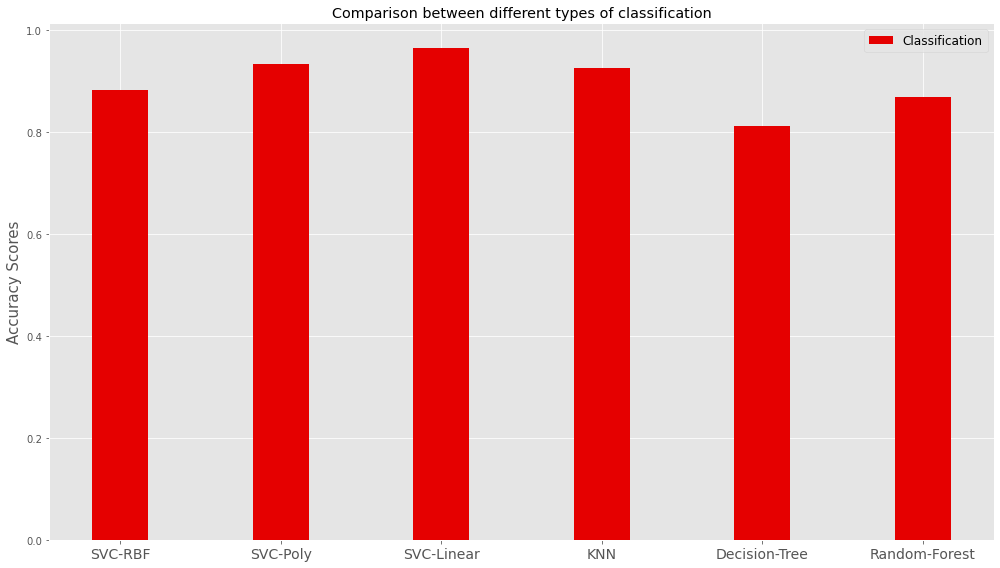

In [25]:
labels = ['SVC-RBF', 'SVC-Poly', 'SVC-Linear', 'KNN', 'Decision-Tree', 'Random-Forest']
x = np.arange(len(labels))  
width = 0.35 
fig, ax = plt.subplots(figsize = (14, 8))
rects1 = ax.bar(x, graph, width, label='Classification', color = 'xkcd:red' )
#rects2 = ax.bar(x + width/2, poly, width, label='Non-Linear', color = 'xkcd:salmon')
ax.set_ylabel('Accuracy Scores', fontsize = 15)
ax.set_title('Comparison between different types of classification')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 14)
ax.legend(fontsize = 12)
fig.tight_layout()
plt.show()